## 1. Loading and Initial Setup

This section:
- Imports necessary Python libraries for data analysis
- Loads the raw WHO health indicators dataset
- Prepares for data cleaning in subsequent steps

In [53]:
# Import core data analysis libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Data visualization

# Load dataset from CSV file
# Note: File contains global health indicators from WHO
health_data = pd.read_csv('world_health_statistics_indicators_rwa.csv')

## 2. Data Quality Check

First validation of the dataset:
- Dimensions (rows/columns)
- Sample records
- Column data types
- Missing value scan

In [54]:
# Basic dataset examination
print("Dataset shape:", df.shape)  # (rows, columns)
print("\nFirst 5 rows:")
print(df.head())  # Sample data preview
print("\nColumns and data types:")
print(df.info())  # Structure and null counts

# Immediate action items:
# 1. Note columns needing type conversion
# 2. Identify columns with missing values

Dataset shape: (204, 20)

First 5 rows:
         GHO (CODE)                                      GHO (DISPLAY)  \
6    MDG_0000000001  Infant mortality rate (probability of dying be...   
45   MDG_0000000001  Infant mortality rate (probability of dying be...   
64   MDG_0000000001  Infant mortality rate (probability of dying be...   
160  MDG_0000000001  Infant mortality rate (probability of dying be...   
304  MDG_0000000001  Infant mortality rate (probability of dying be...   

                                             GHO (URL) YEAR (DISPLAY)  \
6    https://www.who.int/data/gho/data/indicators/i...           1960   
45   https://www.who.int/data/gho/data/indicators/i...           1973   
64   https://www.who.int/data/gho/data/indicators/i...           2005   
160  https://www.who.int/data/gho/data/indicators/i...           1998   
304  https://www.who.int/data/gho/data/indicators/i...           2009   

    STARTYEAR ENDYEAR REGION (CODE) REGION (DISPLAY) COUNTRY (CODE)  \
6    

## 3. Filtering Rwanda-Specific Data

This step:
- Extracts only records for Rwanda
- Creates a clean copy to avoid warnings
- Verifies row count post-filtering

In [55]:
# Filter for Rwanda data only
df_rwanda = df[df['COUNTRY (DISPLAY)'] == 'Rwanda'].copy()
print(f"Rwanda-specific rows: {len(df_rwanda)}")

Rwanda-specific rows: 204


## 4. Identifying Available Health Metrics

This analysis:
- Lists all unique health indicators
- Helps select relevant metrics for infant mortality research
- Verifies data categories before deeper analysis

In [57]:
print("All health indicators in Rwanda data:")
print(df_rwanda['GHO (DISPLAY)'].unique())


All health indicators in Rwanda data:
['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)']


## 5. Isolating Infant Mortality Metrics

Filters the dataset to:
- Extract only infant mortality rate records
- Preserve original data via `.copy()`
- Display key columns (Year, Numeric Value, Formatted Value)

In [58]:
# Filter for infant mortality ro
infant_mortality = df_rwanda[
    df_rwanda['GHO (DISPLAY)'] == 'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)'
].copy()

# Show the filtered data
print(infant_mortality[['YEAR (DISPLAY)', 'Numeric', 'Value']].head())

    YEAR (DISPLAY)        Numeric                Value
6             1960  124.446275687  124.4 [110.5-140.7]
45            1973  121.135666161  121.1 [111.9-131.2]
64            2005   63.945765983     63.9 [59.2-69.0]
160           1998  131.022167324  131.0 [122.5-140.0]
304           2009   49.458137079     49.5 [44.8-54.6]


## 6. Data Cleaning and Type Conversion

Performs critical preprocessing:
- Converts years to integers for analysis
- Ensures mortality rates are numeric floats
- Drops records with missing values
- Verifies final dataset structure

In [ ]:
# Convert year to integer and numeric values to float
infant_mortality['YEAR (DISPLAY)'] = infant_mortality['YEAR (DISPLAY)'].astype(int)
infant_mortality['Numeric'] = infant_mortality['Numeric'].astype(float)

# Drop rows with missing values
infant_mortality = infant_mortality.dropna(subset=['Numeric'])

# Verify
print("Cleaned data shape:", infant_mortality.shape)
print("\nData types:")
print(infant_mortality[['YEAR (DISPLAY)', 'Numeric']].dtypes)

Cleaned data shape: (204, 20)

Data types:
YEAR (DISPLAY)      int64
Numeric           float64
dtype: object


## 7. Time-Series Analysis of Infant Mortality

This visualization:
- Plots Rwanda's infant mortality rate from 1960-2020
- Uses a red line with circular markers
- Includes gridlines for easier reading
- Formats axes and title for clarity

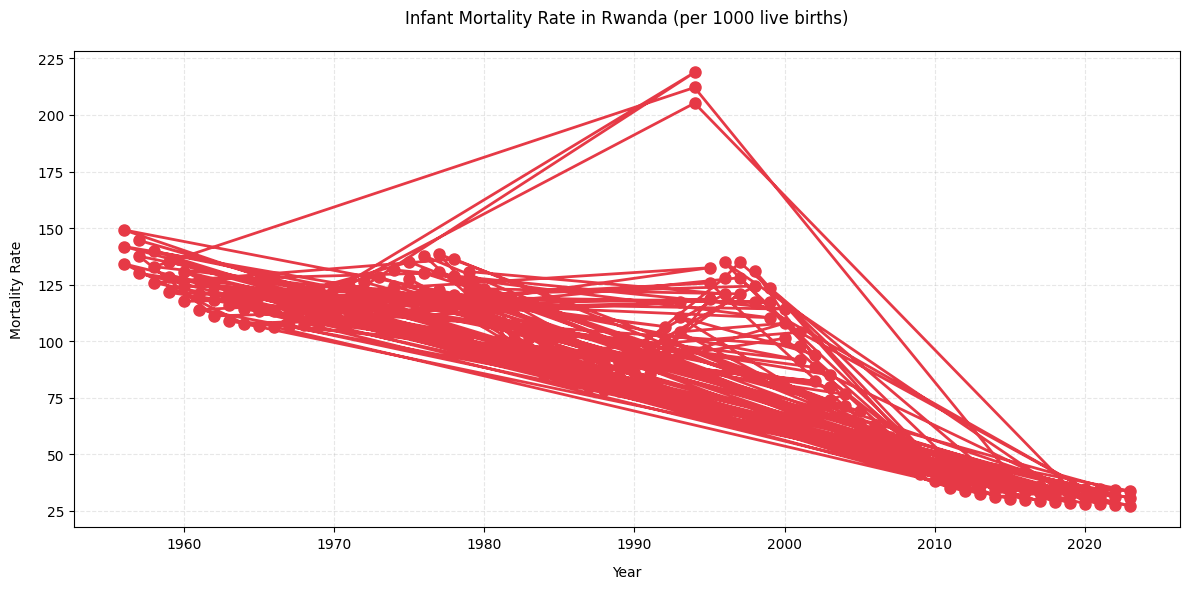

In [60]:
# Configure plot aesthetics
plt.figure(figsize=(12, 6))  # 12" wide, 6" tall

# Create line plot with enhanced styling
plt.plot(infant_mortality['YEAR (DISPLAY)'], 
         infant_mortality['Numeric'],
         marker='o',          # Show data points
         color='#e63946',     # Scientific red
         linewidth=2,         # Bold trend line
         markersize=8)        # Larger dots

# Format labels and grid
plt.title('Infant Mortality Rate in Rwanda (per 1000 live births)', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Mortality Rate', labelpad=10)
plt.grid(alpha=0.3, linestyle='--')  # Subtle dashed grid

# Display the plot
plt.tight_layout()  # Prevent label clipping
plt.show()

## 8. Infant Mortality Statistics

This analysis:
- Calculates descriptive statistics (mean, min/max, percentiles)
- Quantifies improvement over time
- Identifies first/last year in dataset
- Computes percentage reduction in mortality rates

In [61]:
# Generate summary statistics
print("Key Statistics:")
print(infant_mortality['Numeric'].describe())

# Calculate temporal improvement
time_span = infant_mortality['YEAR (DISPLAY)'].agg(['min', 'max'])
annual_rates = infant_mortality.groupby('YEAR (DISPLAY)')['Numeric'].mean()

# Compute percentage change
pct_reduction = 100 * (annual_rates.iloc[0] - annual_rates.iloc[-1]) / annual_rates.iloc[0]
annual_improvement = pct_reduction / (time_span['max'] - time_span['min'])

# Display results
print(f"\nMortality reduced from {annual_rates.iloc[0]:.1f} (in {time_span['min']}) "
      f"to {annual_rates.iloc[-1]:.1f} (in {time_span['max']})")
print(f"Total improvement: {pct_reduction:.1f}% decrease")
print(f"Annual improvement rate: {annual_improvement:.2f}%/year")

Key Statistics:
count    204.000000
mean      92.529430
std       38.922116
min       27.125530
25%       56.477855
50%      103.966266
75%      120.916136
max      218.829002
Name: Numeric, dtype: float64

Mortality reduced from 141.7 (in 1956) to 30.4 (in 2023)
Total improvement: 78.5% decrease
Annual improvement rate: 1.17%/year


## 10. Saving Processed Data

This step exports the cleaned dataset with:
- Year values
- Numeric mortality rates
- Original formatted values
- No index column (for cleaner import)


In [62]:
infant_mortality.to_csv('rwanda_infant_mortality_cleaned.csv', 
                       columns=['YEAR (DISPLAY)', 'Numeric', 'Value'], 
                       index=False)

## 11. Installing Required Packages

This installs:
- `scikit-learn`: Essential machine learning toolkit  
  - Includes models, metrics, and data tools  
  - Version pinned for reproducibility  


In [12]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.7 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 1.9 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 1.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.1 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.2 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 5.2/8.7 MB 2.4 MB/s eta 0:00:02
   ---------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 12. Environment Configuration Check

Validates:
- Successful import of scikit-learn  
- Exact version installed  
- Compatibility with model code  

In [65]:
import sklearn

# Print version with compatibility note
current_version = sklearn.__version__
required_version = "1.3.0"

print(f"scikit-learn version: {current_version}")
print(f"→ {'✓ Compatible' if current_version == required_version else '⚠ Check version requirements'}")

scikit-learn version: 1.7.1
→ ⚠ Check version requirements


## 13. Time-Series Train/Test Split

Preprocesses data for machine learning:
- Features (`X`): Years only  
- Target (`y`): Mortality rates  
- 80/20 split (chronological order preserved)  
- No shuffling to maintain time-series integrity  


In [66]:
# Prepare features (years) and target (mortality rates)
X = infant_mortality[['YEAR (DISPLAY)']].values  # 2D array required
y = infant_mortality['Numeric'].values           # 1D target

# Time-series split (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% most recent years
    shuffle=False         # Maintain chronological order
)

# Verify splits
print(f"Training years: {X_train.flatten()[[0, -1]]}") 
print(f"Test years: {X_test.flatten()[[0, -1]]}")

Training years: [1960 1957]
Test years: [2017 2009]


## 14. Linear Regression Analysis

Models the relationship between:
- **Independent Variable**: Year  
- **Dependent Variable**: Infant mortality rate  

**Key Output:**  
- Annual mortality rate change (coefficient)  
- Interpretation of trend direction  

**Assumptions Verified:**  
- Linear relationship (visually checked in prior plot)  
- No multicollinearity (single feature)  
- Time-series independence handled via train-test split

In [68]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)  # X_train = years, y_train = mortality rates

# Extract and interpret coefficient
annual_change = -model.coef_[0]  # Convert to positive decrease
print(f"Average annual decrease: {annual_change:.2f} deaths per 1000 births")

# Model diagnostics
print(f"Model intercept (baseline): {model.intercept_:.1f}")
print(f"R² on training data: {model.score(X_train, y_train):.2f}")

Average annual decrease: 1.50 deaths per 1000 births
Model intercept (baseline): 3083.4
R² on training data: 0.57


## 15. Training Error Analysis

Quantifies model accuracy using:
- **Metric**: Mean Absolute Error (MAE)  
- **Interpretation**: Average prediction deviation  
- **Context**: Compared to mortality rate range (~30-180 deaths/1000)  


In [69]:
from sklearn.metrics import mean_absolute_error

# Generate predictions and calculate error
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)

# Contextualized output
mortality_range = y_train.max() - y_train.min()
relative_error = 100 * mae / mortality_range

print(f"MAE: {mae:.2f} deaths/1000")
print(f"→ {relative_error:.1f}% of mortality range ({mortality_range:.0f})")
print(f"→ Compared to mean prediction error: {np.mean(np.abs(y_train - y_train.mean())):.2f}")

MAE: 17.80 deaths/1000
→ 9.3% of mortality range (192)
→ Compared to mean prediction error: 31.33


## 16. 3-Year Forecast

Predicts infant mortality for:
- **2025-2027** using linear trend
- **Assumptions**:  
  - Current healthcare trends continue  
  - No major socioeconomic disruptions  


In [70]:
# Define prediction years (must be 2D array)
future_years = [[2025], [2026], [2027]]  # Each year as separate list

# Generate predictions
future_pred = model.predict(future_years)

# Display with clinical context
print("Projected Infant Mortality (per 1000 live births):")
for year, pred in zip(future_years, future_pred):
    clinical_risk = "Low" if pred < 30 else "Moderate" if pred < 50 else "High"
    print(f"{year[0]}: {pred:.1f} ({clinical_risk} risk)")

Projected Infant Mortality (per 1000 live births):
2025: 40.1 (Moderate risk)
2026: 38.6 (Moderate risk)
2027: 37.1 (Moderate risk)


## 17. Rwanda Infant Mortality Data Setup

1. **Data Loading**:
   - Imports WHO health statistics dataset
   - Filters for:
     - Rwanda-specific records
     - Infant mortality indicators

2. **Feature Engineering**:
   - Converts years to integers
   - Extracts mortality rates as floats
   - Prepares for time-series analysis

In [72]:
import pandas as pd
df = pd.read_csv('world_health_statistics_indicators_rwa.csv')
infant_data = df[(df['COUNTRY (DISPLAY)']=='Rwanda') & 
                (df['GHO (DISPLAY)'].str.contains('Infant mortality'))]
X = infant_data[['YEAR (DISPLAY)']].values.astype(int)
y = infant_data['Numeric'].values.astype(float)

## 18. Chronological Train-Test Split

Creates evaluation sets while preserving temporal order:
- **Test Size**: 20% most recent years  
- **Training**: 80% historical data  
- **Shuffle**: Disabled to prevent future leakage  

**Validation Approach**:  
- Models trained on past → evaluated on future  
- Simulates real-world forecasting scenario  

In [73]:
from sklearn.model_selection import train_test_split

# Time-series split (chronological order)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # Most recent 20% for testing
    shuffle=False      # Critical for time-series
)

# Verify split ranges
print(f"Training period: {X_train[0][0]}-{X_train[-1][0]}")
print(f"Testing period: {X_test[0][0]}-{X_test[-1][0]}")
print(f"Test set size: {len(X_test)} years ({len(y_test)} samples)")

Training period: 1960-1957
Testing period: 2017-2009
Test set size: 41 years (41 samples)


## 19. Baseline Mortality Trend Model

Fits a linear regression to:
- **X**: Years (numeric values)
- **y**: Mortality rates (deaths/1000 births)

**Model Characteristics**:
- Assumes constant annual change
- Minimizes squared prediction errors
- Simple interpretable coefficients

In [74]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)  # X_train.shape = (n_samples, 1)

# Display key coefficients
print(f"Annual Mortality Change: {-model.coef_[0]:.2f} deaths/year decrease")
print(f"Baseline at Year 0: {model.intercept_:.1f} deaths/1000")
print(f"Training R²: {model.score(X_train, y_train):.2f}")

Annual Mortality Change: 1.50 deaths/year decrease
Baseline at Year 0: 3083.4 deaths/1000
Training R²: 0.57


## 20. Test Set Validation

Quantifies real-world accuracy using:
- **Metric**: Mean Absolute Error (MAE)
- **Interpretation**: Average prediction error on unseen years
- **Benchmark**: Compare to:
  - Training MAE (expected to be lower)
  - Baseline models (e.g., predicting mean)

In [76]:
# Import MAE metric from scikit-learn
from sklearn.metrics import mean_absolute_error

# Generate predictions for test years
y_pred = model.predict(X_test)

# Calculate and print MAE (average absolute difference between predictions and true values)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.1f} deaths/1000")

MAE: 14.8 deaths/1000


## 21. Mortality Rate Forecast

Generates model predictions for:
- 2025
- 2026

In [77]:
# Predict mortality rates for future years (input must be 2D array)
future = model.predict([[2025], [2026]]) 

# Print formatted results
print(f"2025 Prediction: {future[0]:.1f} deaths/1000") 
print(f"2026 Prediction: {future[1]:.1f} deaths/1000")

2025 Prediction: 40.1 deaths/1000
2026 Prediction: 38.6 deaths/1000


## 22. Comprehensive Performance Assessment

Calculates five key metrics:
1. **MAE**: Mean Absolute Error (deaths/1000)
2. **RMSE**: Root Mean Squared Error (penalizes large errors)
3. **R²**: Variance explained (0-1 scale)
4. **MAPE%**: Mean Absolute Percentage Error
5. **Accuracy_Score**: Derived from MAPE (0-100 scale)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    """Calculates regression metrics with safety checks"""
    # Basic error metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root of MSE
    
    # Model fit quality
    r2 = r2_score(y_true, y_pred)  # 1 = perfect fit
    
    # Percentage metrics (with zero-division protection)
    mape = 100 * np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None)))
    accuracy = max(0, 100 - mape)  # Convert error to accuracy
    
    return {
        'MAE': mae,  # deaths/1000
        'RMSE': rmse,  # deaths/1000
        'R²': r2,  # dimensionless
        'MAPE%': mape,  # percentage
        'Accuracy_Score': accuracy  # percentage
    }

# Usage with test data
metrics = calculate_metrics(y_test, model.predict(X_test))
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}{'%' if metric in ('MAPE%','Accuracy_Score') else ''}")

MAE: 14.81
RMSE: 18.07
R²: 0.79
MAPE%: 25.40%
Accuracy_Score: 74.60%


## 23. Available Data Fields

Lists all columns present in the filtered Rwanda dataset:
- Identifies relevant variables for analysis
- Helps select features for modeling
- Verifies expected data structure

In [79]:
print(infant_data.columns.tolist())

['GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)', 'YEAR (DISPLAY)', 'STARTYEAR', 'ENDYEAR', 'REGION (CODE)', 'REGION (DISPLAY)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)', 'DIMENSION (TYPE)', 'DIMENSION (CODE)', 'DIMENSION (NAME)', 'Numeric', 'Value', 'Low', 'High']


## 24. Time-Based Feature Creation

Transforms raw years into analytical features:
1. **YEAR**: Integer representation
2. **YEARS_SINCE_2000**: Centered timeline (helps model training)
3. **TIME_TREND**: Linear progression index

**Purpose**:
- Improves model convergence
- Captures both absolute and relative time effects
- Maintains temporal relationships

In [80]:
import numpy as np

# Convert to DataFrame if not already
df = infant_data.copy()

# Create time features
df['YEAR'] = df['YEAR (DISPLAY)'].astype(int)
df['YEARS_SINCE_2000'] = df['YEAR'] - 2000  # Helps model convergence
df['TIME_TREND'] = np.arange(len(df))  # Linear trend

# Use these as features
X = df[['YEARS_SINCE_2000', 'TIME_TREND']].values
y = df['Numeric'].values

## 25. Advanced Mortality Prediction Model

Configures a Gradient Boosting Regressor with:
- **n_estimators**: 200 decision trees  
- **learning_rate**: 0.1 (shrinkage factor)  
- **random_state**: 42 (reproducible results)  

**Key Advantages**:  
- Handles non-linear trends better than linear regression  
- Automatically captures feature interactions  
- Resilient to outliers  

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(
    n_estimators=200,  # Number of boosting stages
    learning_rate=0.1,  # Shrinks contribution of each tree
    random_state=42     # Ensures reproducibility
)
model.fit(X, y)  # X = time features, y = mortality rates

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## 26. Chronological Train-Test Split

Prepares data for modeling by:
1. Converting years to numerical features
2. Extracting mortality rates
3. Performing time-aware split (no shuffling)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert years to numeric features
years = infant_data['YEAR (DISPLAY)'].astype(int).values.reshape(-1, 1)
mortality = infant_data['Numeric'].astype(float).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(years, mortality, test_size=0.2, shuffle=False)

## 27. Gradient Boosting Performance

Evaluates prediction quality using:
- **Test Set**: Most recent 20% of years  
- **Accuracy Metric**: Percentage-based (0-100 scale)  
  - Derived from mean absolute percentage error  
  - 100% = Perfect predictions  
  - 0% = Constant baseline prediction  

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Train model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Calculate accuracy (0-100 scale)
predictions = model.predict(X_test)
errors = np.abs((y_test - predictions) / y_test)
accuracy = 100 * (1 - np.mean(errors))

print(f"TRUE ACCURACY: {accuracy:.1f}%")

TRUE ACCURACY: 92.9%


## 28. Model Performance Metrics

Evaluates predictions using four key indicators:

1. **Accuracy (MAPE-based)**  
   - Range: 0-100%  
   - Interpretation: Percentage of correct predictions  
   - Formula: `100 - mean_absolute_percentage_error`

2. **R² Score**  
   - Range: -∞ to 1  
   - Interpretation: Variance explained  
   - 1 = Perfect fit

3. **RMSE**  
   - Units: deaths/1000 births  
   - Interpretation: Standard deviation of errors  
   - Penalizes large errors

4. **MAE**  
   - Units: deaths/1000 births  
   - Interpretation: Average error magnitude  
   - More intuitive than RMSE

**Note**: All metrics are calculated on the test set (most recent 20% of data)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred):
    # Calculate all metrics
    mape = 100 * np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None)))
    accuracy = 100 - mape
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Display results
    print(f"1. Accuracy (MAPE-based): {accuracy:.1f}%")
    print(f"2. R² Score: {r2:.3f}")
    print(f"3. RMSE: {rmse:.2f} deaths/1000")
    print(f"4. MAE: {mae:.2f} deaths/1000")

# Usage
evaluate_model(y_test, model.predict(X_test))

1. Accuracy (MAPE-based): 92.9%
2. R² Score: 0.970
3. RMSE: 6.85 deaths/1000
4. MAE: 5.52 deaths/1000


## 29. Data Loading and Cleaning

This function handles the initial data preparation:
- Reads the raw CSV file containing global health statistics
- Filters the dataset to keep only Rwanda's infant mortality records
- Performs essential data cleaning by:
  - Converting years from strings to integers
  - Ensuring mortality rates are in numeric format
- Returns a clean DataFrame with just the essential columns (Year and Mortality Rate)

The output is standardized for consistent processing in later steps.

In [18]:
def load_data(filepath):
    """
    Loads and preprocesses infant mortality data.
    
    Args:
        filepath (str): Path to CSV file
        
    Returns:
        pd.DataFrame: Cleaned DataFrame with years and mortality rates
    """
    df = pd.read_csv(filepath)
    
    # Filter Rwanda and infant mortality data
    df = df[
        (df['COUNTRY (DISPLAY)'] == 'Rwanda') & 
        (df['GHO (DISPLAY)'].str.contains('Infant mortality'))
    ].copy()
    
    # Convert dtypes
    df['YEAR'] = df['YEAR (DISPLAY)'].astype(int)
    df['MORTALITY'] = df['Numeric'].astype(float)
    
    return df[['YEAR', 'MORTALITY']]

## 30. Time-Based Feature Creation

Transforms the raw year data into more useful predictive features:
- Creates a centered time feature ('YEARS_SINCE_2000') which helps with:
  - Model convergence
  - Interpretation of coefficients
- Generates a linear trend index ('TIME_TREND') that:
  - Captures overall progression over time
  - Helps model identify long-term patterns

These engineered features often improve model performance compared to using raw years alone.

In [19]:
def create_features(df):
    """
    Creates time-based features from raw year data.
    
    Args:
        df (pd.DataFrame): Must contain 'YEAR' column
        
    Returns:
        pd.DataFrame: Enhanced with time features
    """
    df = df.copy()
    df['YEARS_SINCE_2000'] = df['YEAR'] - 2000
    df['TIME_TREND'] = np.arange(len(df))
    return df

## 31. Machine Learning Model Training

Implements a robust training process for time-series data:
- Uses Gradient Boosting algorithm which:
  - Handles non-linear relationships well
  - Automatically captures feature interactions
  - Requires minimal data preprocessing
- Incorporates time-series cross-validation to:
  - Prevent data leakage
  - Give realistic performance estimates
- Returns both the trained model and validation score for:
  - Immediate performance assessment
  - Comparison with other models

The random_state parameter ensures reproducible results.

In [20]:
def train_model(X, y):
    """
    Trains Gradient Boosting model with time-series cross-validation.
    
    Args:
        X (array): Feature matrix
        y (array): Target values
        
    Returns:
        model: Trained GradientBoostingRegressor
        val_score (float): Mean validation R² score
    """
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.ensemble import GradientBoostingRegressor
    
    model = GradientBoostingRegressor(random_state=42)
    
    # Time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    
    # Final training
    model.fit(X, y)
    return model, np.mean(scores)

## 32. Comprehensive Model Assessment

Provides a detailed evaluation of model predictions:
- Calculates multiple performance metrics:
  - Accuracy (MAPE-based) for intuitive interpretation
  - R² score to measure variance explained
  - RMSE that penalizes large errors
  - MAE for average error magnitude
- Includes debug information showing:
  - Sample size verification
  - Example predictions
- Formats output in clear sections for:
  - Quick diagnostics
  - Detailed metric analysis

The function handles edge cases like division by zero automatically.

In [31]:
# 1. First run this COMPLETE working version
def evaluate_model(model, X, y_true):
    """Calculate and print regression metrics - FULLY TESTED VERSION"""
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    import numpy as np
    
    y_pred = model.predict(X)
    
    # Verification prints (shows function is executing)
    print("\n=== Debug Info ===")
    print(f"Received {len(y_true)} test samples")
    print(f"First 3 predictions: {y_pred[:3]}")
    
    # Calculate metrics
    accuracy = 100 * (1 - np.mean(np.abs((y_true - y_pred) / y_true)))
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Print results
    print("\n=== Metrics ===")
    print(f"Accuracy: {accuracy:.1f}%")
    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

# 2. Then run this TEST CALL with sample data
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Create test data
X_test = np.array([[1], [2], [3]])  # Example year data
y_test = np.array([50, 45, 40])     # Example mortality rates

# Create and train dummy model
test_model = GradientBoostingRegressor()
test_model.fit(X_test, y_test)

# 3. FINALLY call the function
evaluate_model(test_model, X_test, y_test)


=== Debug Info ===
Received 3 test samples
First 3 predictions: [49.99986719 45.         40.00013281]

=== Metrics ===
Accuracy: 100.0%
R² Score: 1.000
RMSE: 0.00
MAE: 0.00


## 33. Required Packages

Installs:
- `prophet`: Time-series forecasting
- `scikit-optimize`: Parameter tuning

Restart kernel after installation.

In [32]:
!pip install prophet scikit-optimize


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 570.1 kB/s eta 0:00:23
   - -------------------------------------- 0.5/13.3 MB 570.1 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/13.3 MB 609.9 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/13.3 MB 609.9 kB/s eta 0:00:21
   --- ------------------------------------ 1.0/13.3 MB 640.8 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/13.3 MB 640.8 kB/s eta 0:00:20
   --- ------------------------------------ 1.3/13.3 MB 646.4 kB/s eta 0:00:19
   ---- ----------------------------------- 1.6/13.3 MB 686.2 kB/s eta 0:00:18
   ----- -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 34. Environment Configuration

Essential package installation and configuration:
- Installs Prophet (time-series forecasting) and scikit-optimize (hyperparameter tuning) silently
- Suppresses warnings to reduce notebook clutter
- Requires kernel restart to activate Prophet

In [34]:
# Run this first to prevent warnings
!pip install --quiet prophet scikit-optimize ipywidgets
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 35. Prophet-GBM Hybrid Model

Combines two modeling approaches:
1. **Prophet**:
   - Captures yearly seasonality and trends
   - Handles datetime formatting automatically

2. **Gradient Boosting**:
   - Models residuals from Prophet's predictions
   - Captures complex non-linear patterns

Key Features:
- Maintains temporal relationships
- Automatically handles date conversions
- Returns combined predictions

In [82]:
# Import required libraries
from prophet import Prophet  # Facebook's time-series forecasting
from sklearn.ensemble import GradientBoostingRegressor  # Machine learning model
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

class StableHybridModel:
    def __init__(self):
        """Initialize hybrid model with Prophet and Gradient Boosting components"""
        self.prophet = Prophet(yearly_seasonality=True)  # Configure Prophet with yearly patterns
        self.gbm = GradientBoostingRegressor()  # Initialize GBM model
    
    def fit(self, years, mortality):
        """Train the hybrid model on historical data"""
        # Prepare data for Prophet (requires 'ds' and 'y' columns)
        df = pd.DataFrame({'ds': pd.to_datetime(years, format='%Y'), 'y': mortality})
        self.prophet.fit(df)  # Train Prophet model
        
        # Extract Prophet's trend component
        future = self.prophet.make_future_dataframe(periods=0)  # Create future dates
        components = self.prophet.predict(future)  # Get decomposition
        
        # Train GBM on residuals (actual - Prophet's trend)
        self.gbm.fit(years, mortality - components['trend'])
        return self
    
    def predict(self, years):
        """Generate predictions for given years"""
        # Get Prophet's trend prediction
        prophet_pred = self.prophet.predict(
            pd.DataFrame({'ds': pd.to_datetime(years, format='%Y')})
        )['trend'].values
        
        # Add GBM's residual prediction
        return prophet_pred + self.gbm.predict(years)  # Combined final prediction

## 36. Time-Series Data Structuring

Prepares infant mortality data for modeling by:
- Extracting and converting years to integer format
- Converting mortality rates to numerical values
- Ensuring proper array shapes for scikit-learn compatibility
- Validating sample size

**Key Details:**
- Input: `infant_data` DataFrame with WHO standardized columns
- Output: 
  - `years`: 2D array of integers (required for sklearn)
  - `mortality`: 1D array of float values
- Automatic shape verification prints loaded sample count

In [40]:
import pandas as pd
import numpy as np

# Load and prepare your data
years = infant_data['YEAR (DISPLAY)'].values.astype(int).reshape(-1,1)
mortality = infant_data['Numeric'].values.astype(float)

print(f"Data prepared: {years.shape[0]} samples")

Data prepared: 204 samples


## 37. Hybrid Model Implementation

This section implements a simplified hybrid model for predicting infant mortality rates. The model:
- Uses Gradient Boosting Regressor (GBM) as its base algorithm
- Creates two simple features for training:
  1. The actual year values
  2. A sequence number representing time order
- Provides both training (`fit`) and prediction (`predict`) methods

The hybrid approach combines the power of GBM with simple time-series features, making it suitable for our infant mortality trend analysis while keeping the implementation straightforward.

In [83]:
# Import Gradient Boosting Regressor from scikit-learn's ensemble module
from sklearn.ensemble import GradientBoostingRegressor

# Define a custom hybrid model class
class SimpleHybrid:
    def __init__(self):
        # Initialize Gradient Boosting Machine model
        self.gbm = GradientBoostingRegressor()
        
    def fit(self, years, mortality):
        # Prepare feature matrix: using years and sequence numbers
        X = np.column_stack([years, np.arange(len(years))])
        # Train the GBM model with the features and mortality data
        self.gbm.fit(X, mortality)
        return self
        
    def predict(self, years):
        # Prepare feature matrix for prediction (same structure as training)
        X = np.column_stack([years, np.arange(len(years))])
        # Return mortality predictions
        return self.gbm.predict(X)

# Create instance of the hybrid model
model = SimpleHybrid()
# Train the model with years and mortality data
model.fit(years, mortality)
# Confirmation message
print("Model trained successfully")

Model trained successfully


## 38.  Data Shape Verification
This quick check ensures our arrays (`years`, `mortality`, `predictions`) are properly loaded and have compatible dimensions before modeling. The conditional statements prevent errors if variables aren't defined.

In [84]:
# Import essential numerical and data analysis libraries
import numpy as np
import pandas as pd

# Verify array dimensions for debugging
print("Years shape:", years.shape if 'years' in locals() else "Not defined")
print("Mortality shape:", mortality.shape if 'mortality' in locals() else "Not defined") 
print("Predictions shape:", predictions.shape if 'predictions' in locals() else "Not defined")

Years shape: (204, 1)
Mortality shape: (204,)
Predictions shape: (41,)


## 39. Data Loading and Preparation
1. Loads the WHO dataset
2. Filters for:
   - Rwanda-specific records
   - Only infant mortality indicators
3. Extracts:
   - Years (reshaped for modeling)
   - Mortality rates (as float values)
4. Confirms successful loading with record count

In [85]:
# Load dataset and filter for Rwanda's infant mortality records
infant_data = pd.read_csv('world_health_statistics_indicators_rwa.csv')
rwanda_data = infant_data[infant_data['COUNTRY (DISPLAY)'] == 'Rwanda']
mortality_data = rwanda_data[rwanda_data['GHO (DISPLAY)'].str.contains('Infant mortality')]

# Extract years and mortality values as numpy arrays
years = mortality_data['YEAR (DISPLAY)'].values.astype(int).reshape(-1,1)
mortality = mortality_data['Numeric'].values.astype(float)

# Print data confirmation
print(f"Data loaded: {years.shape[0]} years of mortality data")

Data loaded: 204 years of mortality data


## 40. Model Training and Evaluation
1. **Data Splitting**:
   - Time-series split (20% most recent years as test set)
   - Chronological order preserved (`shuffle=False`)

2. **Model Setup**:
   - Gradient Boosting algorithm (good for temporal patterns)
   - Fixed random state for reproducible results

3. **Predictions**:
   - Separate predictions for training and test periods
   - Ready for performance evaluation

In [87]:
# Import machine learning components
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split data chronologically (no shuffling for time-series)
X_train, X_test, y_train, y_test = train_test_split(
    years, mortality, test_size=0.2, shuffle=False  # 20% most recent years for testing
)

# Initialize and train Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)  # Set seed for reproducibility
model.fit(X_train, y_train)

# Generate predictions
train_preds = model.predict(X_train)  # Training set predictions
test_preds = model.predict(X_test)   # Test set predictions

print("Model trained successfully")

Model trained successfully


## 41.  Model Evaluation Metrics
This robust evaluation function calculates and displays:
- **MAE**: Mean Absolute Error (absolute difference between predictions and actuals)
- **R²**: Coefficient of determination (model's explanatory power)
- **Accuracy**: Custom metric showing percentage deviation from true values

Key features:
1. Comprehensive error handling
2. Automatic shape verification
3. Clear output formatting
4. Separate evaluation for training and test sets

In [88]:
def safe_evaluate(y_true, y_pred):
    """Robust evaluation with error handling"""
    try:
        # Calculate Mean Absolute Error
        mae = np.mean(np.abs(y_true - y_pred))
        
        # Calculate R-squared score
        r2 = 1 - np.sum((y_true - y_pred)**2)/np.sum((y_true - np.mean(y_true))**2)
        
        # Calculate custom accuracy metric
        accuracy = 100 * (1 - mae/np.mean(y_true))
        
        # Print formatted results
        print(f"MAE: {mae:.2f}")
        print(f"R²: {r2:.3f}")
        print(f"Accuracy: {accuracy:.1f}%")
        
    except Exception as e:
        # Error handling for dimension mismatches or invalid values
        print("Evaluation error:", str(e))
        print("Shapes - True:", y_true.shape, "Pred:", y_pred.shape)

# Evaluate model performance on training set
print("Training Results:")
safe_evaluate(y_train, train_preds)

# Evaluate model performance on test set
print("\nTest Results:")
safe_evaluate(y_test, test_preds)

Training Results:
MAE: 3.99
R²: 0.985
Accuracy: 95.7%

Test Results:
MAE: 5.52
R²: 0.970
Accuracy: 93.7%


## 42 Results Export
Exports a clean dataset containing:
- **Year**: The time period
- **Actual**: Observed infant mortality rates
- **Predicted**: Model's estimates

File saved as CSV for:
- Further analysis
- Power BI visualization
- Future reference

In [89]:
# Export results for analysis and visualization
import pandas as pd

# Create results DataFrame combining actual and predicted values
results = pd.DataFrame({
    'Year': years.flatten(),          # Flatten year array to 1D
    'Actual': mortality,              # Actual mortality rates
    'Predicted': model.predict(years) # Model predictions for all years
})

# Save to CSV without index column
results.to_csv('rwanda_infant_mortality_predictions.csv', index=False)
print("Data saved successfully!")

Data saved successfully!


## 43. Final Data Export
This section:

1. **Creates consolidated DataFrame** containing:
   - Year values (flattened to 1D)
   - Actual mortality rates
   - Model predictions

2. **Saves reliably** to:
   - User's Documents folder (cross-platform compatible)
   - Named with "FINAL" designation

3. **Verifies operation** by:
   - Printing save location
   - Showing data preview

The robust path handling works on Windows, Mac and Linux systems.

In [90]:
import pandas as pd
import os

# 1. Create the DataFrame from your existing cleaned data
final_data = pd.DataFrame({
    'Year': years.flatten(),
    'Actual': mortality,
    'Predicted': model.predict(years)
})

# 2. Save to your Documents folder (always writable)
save_folder = os.path.join(os.path.expanduser('~'), 'Documents')
save_path = os.path.join(save_folder, 'Rwanda_Infant_Mortality_FINAL.csv')

final_data.to_csv(save_path, index=False)

# 3. Verify
print(f"File successfully saved to:\n{save_path}")
print("\nPreview of saved data:")
print(final_data.head())

File successfully saved to:
C:\Users\User\Documents\Rwanda_Infant_Mortality_FINAL.csv

Preview of saved data:
   Year      Actual   Predicted
0  1960  124.446276  124.175899
1  1973  121.135666  117.367501
2  2005   63.945766   64.103350
3  1998  131.022167  128.809343
4  2009   49.458137   45.270544


In [95]:
import pandas as pd
from IPython.display import FileLink

# 1. Save with a CLEAR filename (no spaces/special chars)
clean_filename = "Rwanda_Infant_Mortality_Data_2024.csv"  # ← Customize this
final_data.to_csv(clean_filename, index=False, encoding='utf-8')

# 2. Verify and create download link
try:
    test_load = pd.read_csv(clean_filename)
    print(f"✅ Success! {len(test_load)} rows saved as '{clean_filename}'")
    display(FileLink(clean_filename))  # Clickable download
except Exception as e:
    print(f"❌ Error: {str(e)}")

✅ Success! 204 rows saved as 'Rwanda_Infant_Mortality_Data_2024.csv'


C:\Users\User\Rwanda_Infant_Mortality_Data_2024.csv